In [3]:
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import time
data_2021 = pd.read_csv('../DATASET/2021/Hasil_2021.csv')
data_2022 = pd.read_csv('../DATASET/2022/Hasil_2022.csv')
data_2023 = pd.read_csv('../DATASET/2023/Hasil_2023.csv')
data_JP = pd.read_csv('../DATASET/Jumlah penduduk/Jumlah Penduduk .csv')
data_KP = pd.read_csv('../DATASET/Kapasitas Pembangkit/Kapasitas Pembangkit Listrik.csv')
data_final = pd.read_csv('../DATASET/Hasil_Gabungan.csv')

datasets = {
    '2021': data_2021,
    '2022': data_2022,
    '2023': data_2023
}



In [4]:
features = ['Residential_2021', 'Business_2021', 'Industrial_2021', 'Social_2021', 'Gov_Office_2021', 'Pub_Street_2021', 'Total_2021', 'JP_2021', 'KP_2021']

data_T2021 = data_final[features]
robust_scaler = RobustScaler()
data_scaled_2021 = robust_scaler.fit_transform(data_T2021)

kmeans_robust = KMeans(n_clusters=2, random_state=45)
data_T2021['Cluster_Robust'] = kmeans_robust.fit_predict(data_scaled_2021)

centroids_robust = kmeans_robust.cluster_centers_
print("Centroid dengan RobustScaler:", centroids_robust)

Centroid dengan RobustScaler: [[ 0.07785967  0.05085098  0.18001454  0.13232353 -0.0539061   0.12678875
   0.10889737  0.01751603  0.14970021]
 [ 6.26414147  8.03201245 14.31630262  6.2012464   7.36728006  3.32487207
   8.51618894  6.45608669  8.13814895]]


c:\Users\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jeff\AppData\Local\Temp\ipykernel_11792\2912822599.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_T2021['Cluster_Robust'] = kmeans_robust.fit_predict(data_scaled_2021)


In [5]:
data_final['Cluster_Robust'] = kmeans_robust.fit_predict(data_scaled_2021)
provinsi_per_cluster = data_final[['Province', 'Cluster_Robust']].sort_values(by='Cluster_Robust')

for cluster in range(2):  
    print(f"Provinsi dalam Cluster {cluster}:")
    print(provinsi_per_cluster[provinsi_per_cluster['Cluster_Robust'] == cluster]['Province'].tolist())
    print("\n")

Provinsi dalam Cluster 0:
['Aceh', 'DI Yogyakarta', 'Nusa Tenggara Timur', 'Nusa Tenggara Barat', 'Bali', 'Papua Barat', 'Papua', 'Maluku Utara', 'Maluku Utara', 'Maluku', 'Sulawesi Tenggara', 'Kalimantan Timur', 'Gorontalo', 'Sulawesi Utara', 'Sulawesi Tengah', 'Kalimantan Tengah', 'Sumatera Utara', 'Sumatera Barat', 'Sulawesi Utara', 'Kep. Riau', 'Sumatera Selatan', 'Riau', 'Bengkulu', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Kalimantan Selatan', 'Jambi', 'Kalimantan Utara']


Provinsi dalam Cluster 1:
['Jawa Timur', 'Jawa Tengah', 'Jawa Barat', 'Banten', 'DKI Jakarta']




c:\Users\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


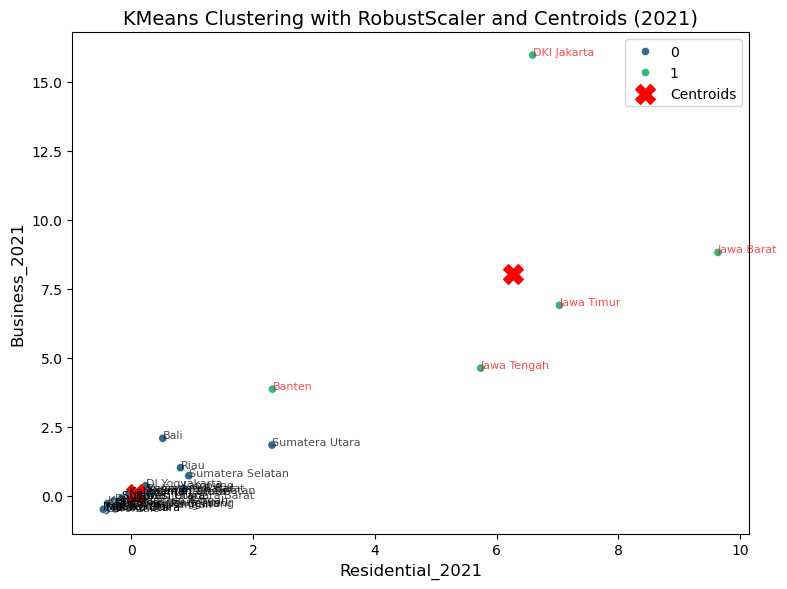

Provinsi dalam Cluster 0:
['Aceh', 'DI Yogyakarta', 'Nusa Tenggara Timur', 'Nusa Tenggara Barat', 'Bali', 'Papua Barat', 'Papua', 'Maluku Utara', 'Maluku Utara', 'Maluku', 'Sulawesi Tenggara', 'Kalimantan Timur', 'Gorontalo', 'Sulawesi Utara', 'Sulawesi Tengah', 'Kalimantan Tengah', 'Sumatera Utara', 'Sumatera Barat', 'Sulawesi Utara', 'Kep. Riau', 'Sumatera Selatan', 'Riau', 'Bengkulu', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Kalimantan Selatan', 'Jambi', 'Kalimantan Utara']


Provinsi dalam Cluster 1:
['Jawa Timur', 'Jawa Tengah', 'Jawa Barat', 'Banten', 'DKI Jakarta']




In [18]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=data_scaled_2021_robust[:, 0], y=data_scaled_2021_robust[:, 1], hue=data_final['Cluster_Robust'], palette='viridis')
plt.scatter(centroids_robust[:, 0], centroids_robust[:, 1], c='red', marker='X', label='Centroids', s=200)

for i in range(len(data_final)):
    if data_final['Cluster_Robust'][i] == 0:  
        plt.text(data_scaled_2021_robust[i, 0], data_scaled_2021_robust[i, 1], data_final['Province'][i], fontsize=8, color='black', alpha=0.7)
    else:  
        plt.text(data_scaled_2021_robust[i, 0], data_scaled_2021_robust[i, 1], data_final['Province'][i], fontsize=8, color='red', alpha=0.7)

plt.title('KMeans Clustering with RobustScaler and Centroids (2021)', fontsize=14)
plt.xlabel('Residential_2021', fontsize=12)
plt.ylabel('Business_2021', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

provinsi_per_cluster_robust = data_final[['Province', 'Cluster_Robust']].sort_values(by='Cluster_Robust')

# Print the provinces in each cluster
for cluster in range(2):
    print(f"Provinsi dalam Cluster {cluster}:")
    print(provinsi_per_cluster_robust[provinsi_per_cluster_robust['Cluster_Robust'] == cluster]['Province'].tolist())
    print("\n")

In [6]:
features = ['Residential_2022', 'Business_2022', 'Industrial_2022', 'Social_2022', 'Gov_Office_2022', 'Pub_Street_2022', 'Total_2022', 'JP_2022', 'KP_2022']

data_T2022 = data_final[features]

robust_scaler2 = RobustScaler()
data_scaled_2022 = robust_scaler2.fit_transform(data_T2022)

kmeans_robust2 = KMeans(n_clusters=2, random_state=45)
data_T2022['Cluster_Robust'] = kmeans_robust2.fit_predict(data_scaled_2022)

centroids_robust2 = kmeans_robust2.cluster_centers_
print("Centroid dengan RobustScaler:", centroids_robust2)

Centroid dengan RobustScaler: [[ 0.06784828  0.07566878  0.24647832  0.12033109 -0.0624232   0.19116044
   0.11901842 -0.02662401  0.08006728]
 [ 6.02632336  8.36979058 15.13676147  6.36928946  7.67662637  3.49126387
   8.27053158  7.74392621  9.23668334]]


c:\Users\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jeff\AppData\Local\Temp\ipykernel_11792\906994319.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_T2022['Cluster_Robust'] = kmeans_robust2.fit_predict(data_scaled_2022)


In [7]:
data_final['Cluster_Robust'] = kmeans_robust2.fit_predict(data_scaled_2022)
provinsi_per_cluster2 = data_final[['Province', 'Cluster_Robust']].sort_values(by='Cluster_Robust')

for cluster in range(2):  
    print(f"Provinsi dalam Cluster {cluster}:")
    print(provinsi_per_cluster2[provinsi_per_cluster2['Cluster_Robust'] == cluster]['Province'].tolist())
    print("\n")

Provinsi dalam Cluster 0:
['Aceh', 'DI Yogyakarta', 'Nusa Tenggara Timur', 'Nusa Tenggara Barat', 'Bali', 'Papua Barat', 'Papua', 'Maluku Utara', 'Maluku Utara', 'Maluku', 'Sulawesi Tenggara', 'Kalimantan Timur', 'Gorontalo', 'Sulawesi Utara', 'Sulawesi Tengah', 'Kalimantan Tengah', 'Sumatera Utara', 'Sumatera Barat', 'Sulawesi Utara', 'Kep. Riau', 'Sumatera Selatan', 'Riau', 'Bengkulu', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Kalimantan Selatan', 'Jambi', 'Kalimantan Utara']


Provinsi dalam Cluster 1:
['Jawa Timur', 'Jawa Tengah', 'Jawa Barat', 'Banten', 'DKI Jakarta']




c:\Users\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
features = ['Residential', 'Business', 'Industrial', 'Social', 'Gov_Office', 'Pub_Street', 'Total', 'JP_2023', 'KP_2023']

data_T2023 = data_final[features]

robust_scaler3 = RobustScaler()
data_scaled_2023 = robust_scaler3.fit_transform(data_T2023)

kmeans_robust3 = KMeans(n_clusters=2, random_state=45)
data_T2023['Cluster_Robust'] = kmeans_robust3.fit_predict(data_scaled_2023)

centroids_robust3 = kmeans_robust3.cluster_centers_
print("Centroid dengan RobustScaler:", centroids_robust3)

Centroid dengan RobustScaler: [[ 0.03788054  0.03540252  0.27619479  0.13607395 -0.09625885  0.15971829
   0.12667402 -0.02681563  0.08040312]
 [ 5.478069    6.63788314 12.83324746  5.72773018  7.81516452  2.95397294
   7.21334791  7.69815006  7.97869367]]


c:\Users\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jeff\AppData\Local\Temp\ipykernel_11792\4140610069.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_T2023['Cluster_Robust'] = kmeans_robust3.fit_predict(data_scaled_2023)


In [9]:
data_final['Cluster_Robust'] = kmeans_robust3.fit_predict(data_scaled_2023)
provinsi_per_cluster3 = data_final[['Province', 'Cluster_Robust']].sort_values(by='Cluster_Robust')

for cluster in range(2):  
    print(f"Provinsi dalam Cluster {cluster}:")
    print(provinsi_per_cluster3[provinsi_per_cluster3['Cluster_Robust'] == cluster]['Province'].tolist())
    print("\n")

Provinsi dalam Cluster 0:
['Aceh', 'DI Yogyakarta', 'Nusa Tenggara Timur', 'Nusa Tenggara Barat', 'Bali', 'Papua Barat', 'Papua', 'Maluku Utara', 'Maluku Utara', 'Maluku', 'Sulawesi Tenggara', 'Kalimantan Timur', 'Gorontalo', 'Sulawesi Utara', 'Sulawesi Tengah', 'Kalimantan Tengah', 'Sumatera Utara', 'Sumatera Barat', 'Sulawesi Utara', 'Kep. Riau', 'Sumatera Selatan', 'Riau', 'Bengkulu', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Kalimantan Selatan', 'Jambi', 'Kalimantan Utara']


Provinsi dalam Cluster 1:
['Jawa Timur', 'Jawa Tengah', 'Jawa Barat', 'Banten', 'DKI Jakarta']




c:\Users\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


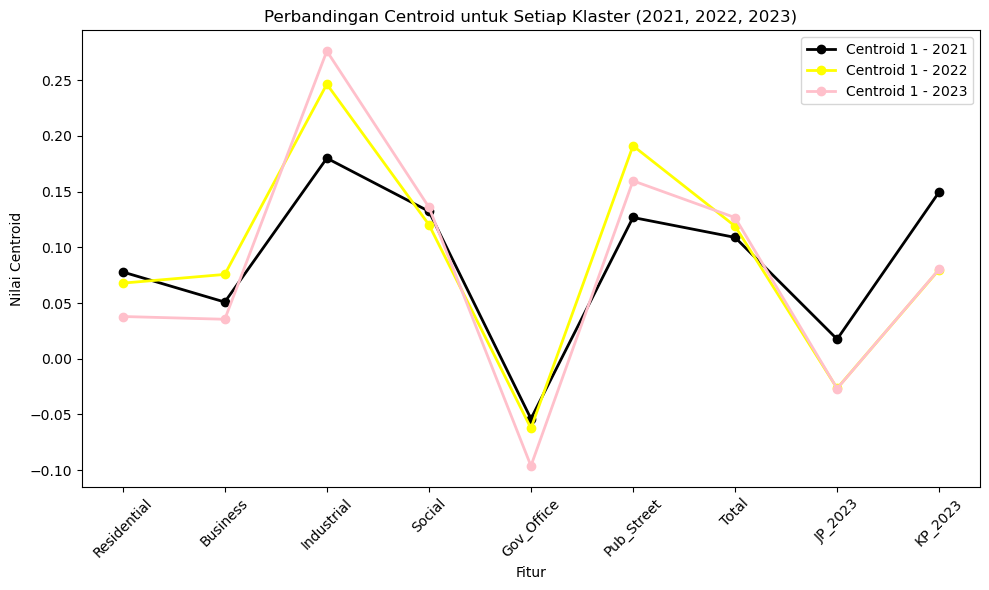

In [10]:
plt.figure(figsize=(10, 6))

plt.plot(features, centroids_robust[0], label="Centroid 1 - 2021", marker='o', color='black', linestyle='-', linewidth=2)
plt.plot(features, centroids_robust2[0], label="Centroid 1 - 2022", marker='o', color='yellow', linestyle='-', linewidth=2)
plt.plot(features, centroids_robust3[0], label="Centroid 1 - 2023", marker='o', color='pink', linestyle='-', linewidth=2)

plt.xlabel('Fitur')
plt.ylabel('Nilai Centroid')
plt.title('Perbandingan Centroid untuk Setiap Klaster (2021, 2022, 2023)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
from sklearn.metrics import silhouette_score

sil_score_2021 = silhouette_score(data_scaled_2021, data_T2021['Cluster_Robust'])
print(f"Silhouette Score untuk 2021: {sil_score_2021}")

sil_score_2022 = silhouette_score(data_scaled_2022, data_T2022['Cluster_Robust'])
print(f"Silhouette Score untuk 2022: {sil_score_2022}")

sil_score_2023 = silhouette_score(data_scaled_2023, data_T2023['Cluster_Robust'])
print(f"Silhouette Score untuk 2023: {sil_score_2023}")

Silhouette Score untuk 2021: 0.8182831197172582
Silhouette Score untuk 2022: 0.8186232922822265
Silhouette Score untuk 2023: 0.8054574748126749


In [12]:
from sklearn.metrics import davies_bouldin_score
dbi_kmeans2021 = davies_bouldin_score(data_scaled_2021, data_T2021['Cluster_Robust'])
print(f"DBI untuk KMeans: {dbi_kmeans2021}")

dbi_kmeans2022 = davies_bouldin_score(data_scaled_2022, data_T2022['Cluster_Robust'])
print(f"DBI untuk KMeans: {dbi_kmeans2022}")

dbi_kmeans2023 = davies_bouldin_score(data_scaled_2023, data_T2023['Cluster_Robust'])
print(f"DBI untuk KMeans: {dbi_kmeans2023}")

DBI untuk KMeans: 0.55076599505755
DBI untuk KMeans: 0.5563485104154855
DBI untuk KMeans: 0.5818627807531498


Centroid dengan RobustScaler: [[ 0.07785967  0.05085098  0.18001454  0.13232353 -0.0539061   0.12678875
   0.10889737  0.01751603  0.14970021]
 [ 6.26414147  8.03201245 14.31630262  6.2012464   7.36728006  3.32487207
   8.51618894  6.45608669  8.13814895]]


c:\Users\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


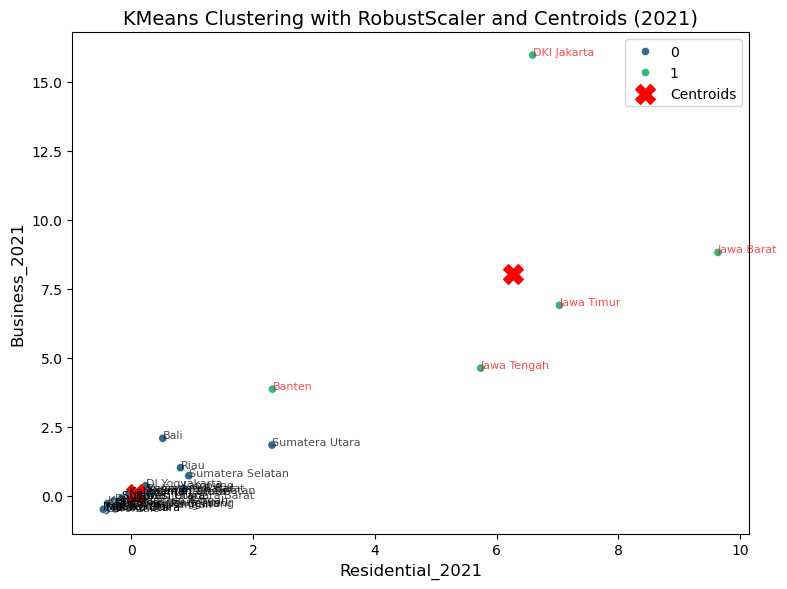

Provinsi dalam Cluster 0:
['Aceh', 'DI Yogyakarta', 'Nusa Tenggara Timur', 'Nusa Tenggara Barat', 'Bali', 'Papua Barat', 'Papua', 'Maluku Utara', 'Maluku Utara', 'Maluku', 'Sulawesi Tenggara', 'Kalimantan Timur', 'Gorontalo', 'Sulawesi Utara', 'Sulawesi Tengah', 'Kalimantan Tengah', 'Sumatera Utara', 'Sumatera Barat', 'Sulawesi Utara', 'Kep. Riau', 'Sumatera Selatan', 'Riau', 'Bengkulu', 'Kep. Bangka Belitung', 'Lampung', 'Kalimantan Barat', 'Kalimantan Selatan', 'Jambi', 'Kalimantan Utara']


Provinsi dalam Cluster 1:
['Jawa Timur', 'Jawa Tengah', 'Jawa Barat', 'Banten', 'DKI Jakarta']




In [ ]:


centroids_robust = kmeans_robust.cluster_centers_
print("Centroid dengan RobustScaler:", centroids_robust)

plt.figure(figsize=(8, 6))

sns.scatterplot(x=data_scaled_2021_robust[:, 0], y=data_scaled_2021_robust[:, 1], hue=data_final['Cluster_Robust'], palette='viridis')
plt.scatter(centroids_robust[:, 0], centroids_robust[:, 1], c='red', marker='X', label='Centroids', s=200)

for i in range(len(data_final)):
    if data_final['Cluster_Robust'][i] == 0:  
        plt.text(data_scaled_2021_robust[i, 0], data_scaled_2021_robust[i, 1], data_final['Province'][i], fontsize=8, color='black', alpha=0.7)
    else:  
        plt.text(data_scaled_2021_robust[i, 0], data_scaled_2021_robust[i, 1], data_final['Province'][i], fontsize=8, color='red', alpha=0.7)

plt.title('KMeans Clustering with RobustScaler and Centroids (2021)', fontsize=14)
plt.xlabel('Residential_2021', fontsize=12)
plt.ylabel('Business_2021', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

provinsi_per_cluster_robust = data_final[['Province', 'Cluster_Robust']].sort_values(by='Cluster_Robust')

for cluster in range(2):
    print(f"Provinsi dalam Cluster {cluster}:")
    print(provinsi_per_cluster_robust[provinsi_per_cluster_robust['Cluster_Robust'] == cluster]['Province'].tolist())
    print("\n")


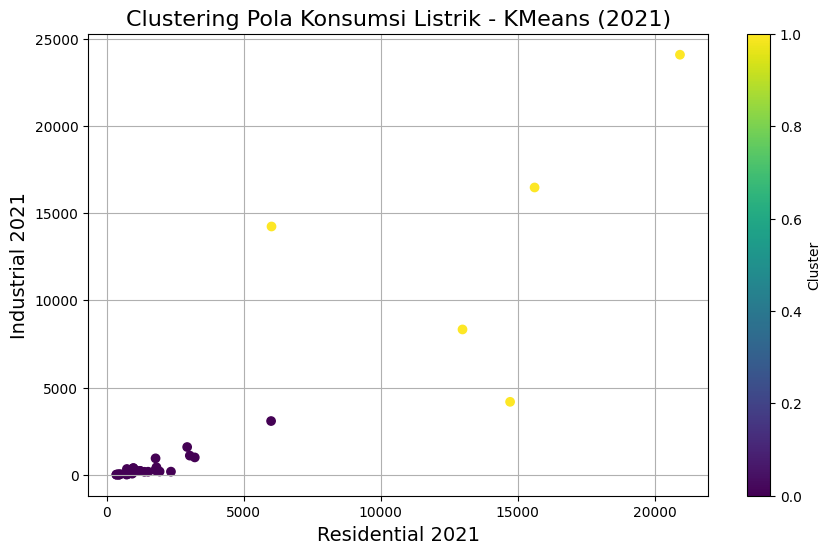

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data_final['Residential_2021'], data_final['Industrial_2021'], c=data_T2021['Cluster_Robust'], cmap='viridis', marker='o')
plt.title('Clustering Pola Konsumsi Listrik - KMeans (2021)', fontsize=16)
plt.xlabel('Residential 2021', fontsize=14)
plt.ylabel('Industrial 2021', fontsize=14)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

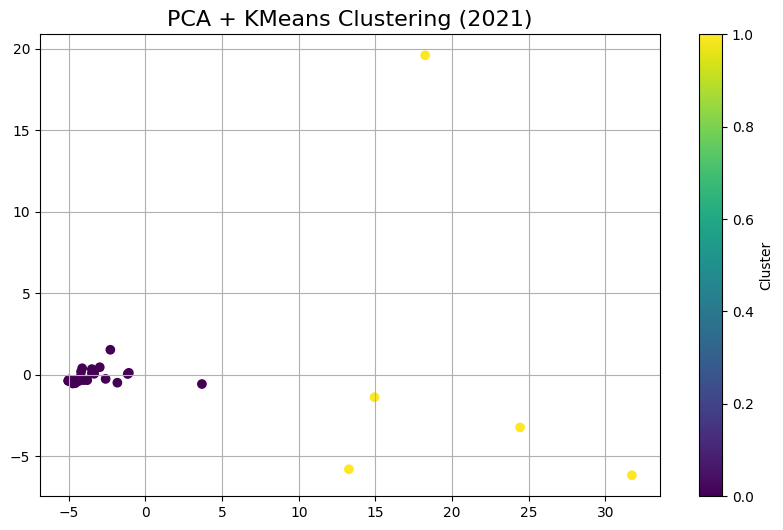

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=data_T2021['Cluster_Robust'], cmap='viridis', marker='o')
plt.title('PCA + KMeans Clustering (2021)', fontsize=16)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

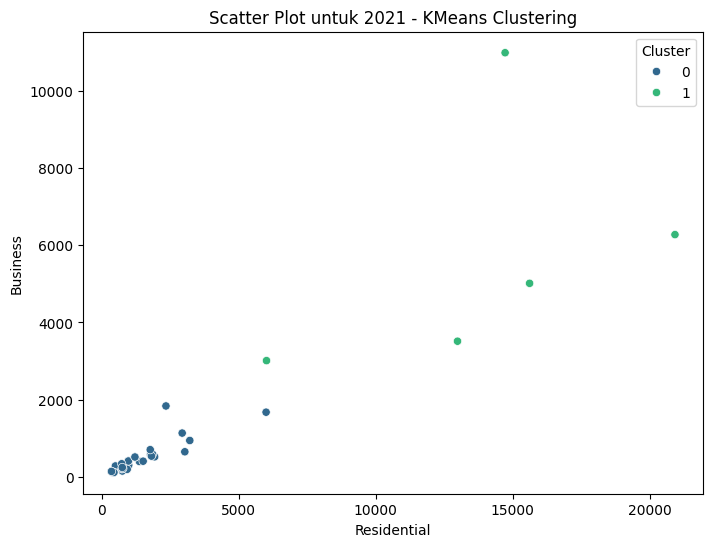

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Residential_2021', y='Business_2021', hue='Cluster_Robust', palette='viridis', data=data_T2021)
plt.title('Scatter Plot untuk 2021 - KMeans Clustering')
plt.xlabel('Residential')
plt.ylabel('Business')
plt.legend(title='Cluster')
plt.show()